<a href="https://colab.research.google.com/github/domoto86/lcbo-clustering/blob/main/LCBO_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [64]:
main_data_df = pd.read_csv('lcbo_wines.csv')

In [65]:
main_data_df.head()

,Name,Regular Price,Sale Price,Rating,Reviews,Size,Description,Category,Alcohol/Vol,Made In,By,Sugar Content,Varietal,Release Date,Lat,Lon
0,Ruffino Prosecco Rose DOC,20.00,18.00,5.0,(2),750 ml bottle,Ruffino has been at the forefront of Italian w...,Rosé & Red Sparkling Wine,11%,"Friuli, Italy",Ruffino Srl Wines,21 g/L,Sparkling,NaN,45.441300,11.596660
1,Josh Cellars Pinot Grigio,19.95,17.95,4.5,(17),750 ml bottle,Josh Cellars is a renowned brand created to ce...,White Wine,12.5%,"California, United States",Josh Cellars,3 g/L,Pinot Grigio,NaN,36.701463,-118.755997
2,Collavini Pinot Grigio,16.55,14.55,4.5,(6),750 ml bottle,"This pinot grigio is a customer favourite, and...",White Wine,12.5%,"Veneto, Italy",Collavini,4 g/L,Pinot Grigio,NaN,45.647666,11.866525
3,19 Crimes Snoop Dogg Cali Red,19.95,17.95,3.7,(63),750 ml bottle,"19 Crimes wines are defiant by nature, bold an...",Red Wine,14.1%,"California, United States",19 Crimes,21 g/L,Red Blend,NaN,36.701463,-118.755997
4,Peller Family Vineyards Pinot Grigio,10.95,9.95,5.0,(3),750 ml bottle,"Easy drinking, refreshing white wine, sourced ...",White Wine,12%,Canada,Peller Family Vineyards,6 g/L,Pinot Grigio,NaN,61.066692,-107.991707


In [66]:
main_data_df.dtypes


Name              object
Regular Price    float64
Sale Price       float64
Rating           float64
Reviews           object
Size              object
Description       object
Category          object
Alcohol/Vol       object
Made In           object
By                object
Sugar Content     object
Varietal          object
Release Date      object
Lat              float64
Lon              float64
dtype: object

In [67]:
main_data_df['Sugar Content (g/L)'] = main_data_df['Sugar Content'].str.replace('g/L', '')
main_data_df['Alcohol/Vol'] = main_data_df['Alcohol/Vol'].str.replace('%', '')
main_data_df = main_data_df.fillna(0)
main_data_df = main_data_df.drop(['Sugar Content'], axis = 1)

In [68]:
main_data_df['Sugar Content (g/L)'] = main_data_df['Sugar Content (g/L)'].astype(float)
main_data_df['Alcohol/Vol'] = main_data_df['Alcohol/Vol'].astype(float)
main_data_df['Regular Price'] = main_data_df['Regular Price'].astype(float)
main_data_df['Sale Price'] = main_data_df['Sale Price'].astype(float)

In [69]:
main_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 167 non-null    object 
 1   Regular Price        167 non-null    float64
 2   Sale Price           167 non-null    float64
 3   Rating               167 non-null    float64
 4   Reviews              167 non-null    object 
 5   Size                 167 non-null    object 
 6   Description          167 non-null    object 
 7   Category             167 non-null    object 
 8   Alcohol/Vol          167 non-null    float64
 9   Made In              167 non-null    object 
 10  By                   167 non-null    object 
 11  Varietal             167 non-null    object 
 12  Release Date         167 non-null    object 
 13  Lat                  167 non-null    float64
 14  Lon                  167 non-null    float64
 15  Sugar Content (g/L)  167 non-null    flo

In [70]:
main_data_df.head()

,Name,Regular Price,Sale Price,Rating,Reviews,Size,Description,Category,Alcohol/Vol,Made In,By,Varietal,Release Date,Lat,Lon,Sugar Content (g/L)
0,Ruffino Prosecco Rose DOC,20.00,18.00,5.0,(2),750 ml bottle,Ruffino has been at the forefront of Italian w...,Rosé & Red Sparkling Wine,11.0,"Friuli, Italy",Ruffino Srl Wines,Sparkling,0,45.441300,11.596660,21.0
1,Josh Cellars Pinot Grigio,19.95,17.95,4.5,(17),750 ml bottle,Josh Cellars is a renowned brand created to ce...,White Wine,12.5,"California, United States",Josh Cellars,Pinot Grigio,0,36.701463,-118.755997,3.0
2,Collavini Pinot Grigio,16.55,14.55,4.5,(6),750 ml bottle,"This pinot grigio is a customer favourite, and...",White Wine,12.5,"Veneto, Italy",Collavini,Pinot Grigio,0,45.647666,11.866525,4.0
3,19 Crimes Snoop Dogg Cali Red,19.95,17.95,3.7,(63),750 ml bottle,"19 Crimes wines are defiant by nature, bold an...",Red Wine,14.1,"California, United States",19 Crimes,Red Blend,0,36.701463,-118.755997,21.0
4,Peller Family Vineyards Pinot Grigio,10.95,9.95,5.0,(3),750 ml bottle,"Easy drinking, refreshing white wine, sourced ...",White Wine,12.0,Canada,Peller Family Vineyards,Pinot Grigio,0,61.066692,-107.991707,6.0


In [71]:
main_data_df['Category'].value_counts()

White Wine                   71
Red Wine                     70
Rose Wine                    12
White Sparkling Wine          6
Rosé & Red Sparkling Wine     3
Flavoured Wine\t              3
White Champagne               1
Port                          1
Name: Category, dtype: int64

In [74]:
main_data_df['Category']=main_data_df['Category'].astype('category').cat.codes

In [76]:
main_data_df.head(2)

,Name,Regular Price,Sale Price,Rating,Reviews,Size,Description,Category,Alcohol/Vol,Made In,By,Varietal,Release Date,Lat,Lon,Sugar Content (g/L)
0,Ruffino Prosecco Rose DOC,20.00,18.00,5.0,(2),750 ml bottle,Ruffino has been at the forefront of Italian w...,4,11.0,"Friuli, Italy",Ruffino Srl Wines,Sparkling,0,45.441300,11.596660,21.0
1,Josh Cellars Pinot Grigio,19.95,17.95,4.5,(17),750 ml bottle,Josh Cellars is a renowned brand created to ce...,7,12.5,"California, United States",Josh Cellars,Pinot Grigio,0,36.701463,-118.755997,3.0


In [80]:
main_scaled= StandardScaler().fit_transform(main_data_df[[
    'Regular Price', 'Sale Price', 'Alcohol/Vol', 'Sugar Content (g/L)', 'Category']])
main_scaled

array([[-0.0313214 , -0.02704068, -0.83531341,  0.5910603 , -0.14494521],
       [-0.03724515, -0.03337419, -0.03117057, -0.44674768,  1.08586071],
       [-0.44006032, -0.46405296, -0.03117057, -0.38909168,  1.08586071],
       [-0.03724515, -0.03337419,  0.8265818 ,  0.5910603 , -0.96548249],
       [-1.1035206 , -1.04673601, -0.29921818, -0.27377968,  1.08586071],
       [-0.86064675, -0.78706204, -1.63945626, -0.04315569,  1.08586071],
       [-0.5052216 , -0.47038647, -0.5672658 ,  0.12981231, -0.14494521],
       [ 0.0812299 ,  0.09329604, -0.5672658 ,  0.12981231,  0.67559207],
       [-0.98504555, -1.04673601, -0.03117057, -0.04315569,  1.08586071],
       [-0.31566152, -0.33104922,  0.23687705, -0.50440368, -0.96548249],
       [ 0.67360515,  0.72664717,  0.77297228, -0.38909168, -0.96548249],
       [ 0.5551301 ,  0.59997694,  0.50492466, -0.21612368, -0.96548249],
       [-0.52299286, -0.55272212, -0.03117057, -0.50440368, -0.55521385],
       [-0.49929785, -0.52738808, -0.2

In [81]:

main_scaled_df = pd.DataFrame(main_scaled, columns = [
    'Regular Price', 'Sale Price', 'Alcohol/Vol', 'Sugar Content (g/L)', 'Category'])

In [82]:
main_scaled_df.sample(20)

,Regular Price,Sale Price,Alcohol/Vol,Sugar Content (g/L),Category
44,-0.268271,-0.407051,0.504925,-0.504404,1.085861
141,-0.629620,-0.666725,-0.299218,0.302780,1.085861
130,-0.392670,-0.413385,0.290487,-0.331436,-0.965482
3,-0.037245,-0.033374,0.826582,0.591060,-0.965482
62,-0.985046,-0.920066,-0.513656,0.591060,0.675592
5,-0.860647,-0.787062,-1.639456,-0.043156,1.085861
82,-0.392670,-0.413385,0.236877,-0.043156,-0.965482
56,-0.629620,-0.666725,0.504925,0.014500,-0.965482
13,-0.499298,-0.527388,-0.299218,-0.273780,1.085861
160,-0.748095,-0.793396,0.236877,-0.158468,1.085861


In [83]:
inertia=[]
k=list(range(1, 15))

In [84]:
for i in k:
    category_model=KMeans(n_clusters=i, random_state=0)
    category_model.fit(main_scaled_df)
    inertia.append(category_model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [85]:
category_elbow = {'k':k, 'inertia':inertia}
elbow_df = pd.DataFrame(category_elbow)

In [86]:
elbow_df.head()

,k,inertia
0,1,835.000000
1,2,597.322155
2,3,427.384928
3,4,271.224576
4,5,224.554189


<Axes: xlabel='k'>

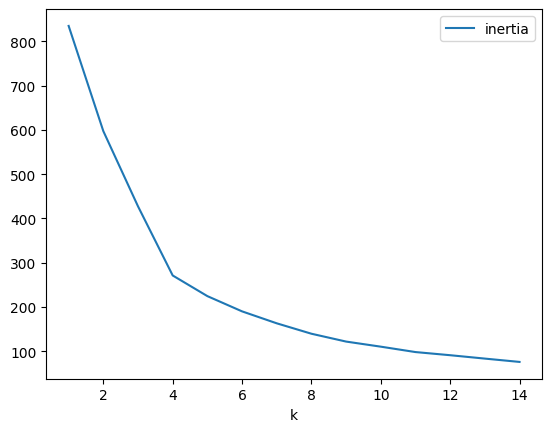

In [87]:
elbow_df.plot('k', 'inertia')

In [88]:
model=KMeans(n_clusters=5, random_state=0)

In [89]:
model.fit(main_scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

In [90]:
category_predict_df = model.predict(main_scaled_df)

In [91]:
main_data_df['Segment'] = category_predict_df

In [92]:
main_data_df.sample(10)


,Name,Regular Price,Sale Price,Rating,Reviews,Size,Description,Category,Alcohol/Vol,Made In,By,Varietal,Release Date,Lat,Lon,Sugar Content (g/L),Segment
147,Robert Oatley Signature Series Chardonnay,20.95,18.95,4.2,(5),750 ml bottle,"Complexity and elaborate, expressive flavours ...",7,12.5,"Western Australia, Australia",Vintages Essentials,Chardonnay,"April 1, 2021",-25.230300,121.018725,4.0,2
67,Pelee Island Gewüztraminer,12.45,11.45,4.7,(3),750 ml bottle,"Pale straw/yellow colour; pear, floral, lychee...",7,12.5,Canada,Pelee Island,Gewürztraminer,0,61.066692,-107.991707,18.0,2
70,Whitecliff Rosé,15.00,13.00,4.5,(2),750 ml bottle,A wonderful dry rosé that's made in a crowd-pl...,3,13.0,"Hawke's Bay, New Zealand",Whitecliff,Rose Wines,0,-39.525651,176.761146,5.0,0
45,Tom Gore Chardonnay,19.95,17.95,4.0,(5),750 ml bottle,"From second-generation grape farmer Tom Gore, ...",7,13.0,"California, United States",Tom Gore,Chardonnay/Sauvignon Blanc,0,36.701463,-118.755997,4.0,2
29,Ricasoli Rocca Guicciarda Riserva Chianti Cla...,24.95,20.95,4.7,(3),750 ml bottle,Barone Ricasoli is the oldest winery in Italy....,2,13.5,"Tuscany, Italy",Barone Ricasoli,Chianti,"April 1, 2022",43.458654,11.138920,2.0,0
66,Vineland Estates Unoaked Chardonnay VQA,15.95,13.95,4.5,(2),750 ml bottle,"Bright yellow colour; aromas of yellow plum, c...",7,13.0,"Ontario, Canada",Vineland Estates,Chardonnay,0,50.000678,-86.000977,5.0,2
56,Yellow Tail Shiraz,14.95,12.95,4.5,(4),750 ml bottle,From Australia's largest family-owned wine com...,2,13.5,Australia,Yellow Tail,Shiraz/Syrah,0,-24.776109,134.755000,11.0,0
162,Chamisal Santa Rita Hills Chardonnay 2016,39.95,35.95,4.0,(1),750 ml bottle,"A brilliant wine, the 2016 Chardonnay Sta Rita...",7,14.2,"California, United States",Chamisal,Chardonnay,"February 18, 2023",36.701463,-118.755997,2.0,1
81,Luigi Bosca Malbec,19.95,17.95,4.3,(6),750 ml bottle,Mendoza is one of the most important wine regi...,2,14.5,"Mendoza, Argentina",Luigi Bosca,Malbec,"April 1, 2021",-32.889415,-68.844618,3.0,0
144,Wayne Gretzky Cabernet Merlot VQA,47.95,44.95,3.7,(6),3000 ml bagnbox,This bold and fruit forward expression of cabe...,2,12.0,"Ontario, Canada",Wayne Gretzky,Cabernet/Merlot,0,50.000678,-86.000977,5.0,1


In [94]:
main_data_df['Segment'].value_counts()

0    73
2    70
1    17
3     6
4     1
Name: Segment, dtype: int64

<Axes: xlabel='Sugar Content (g/L)', ylabel='Segment'>

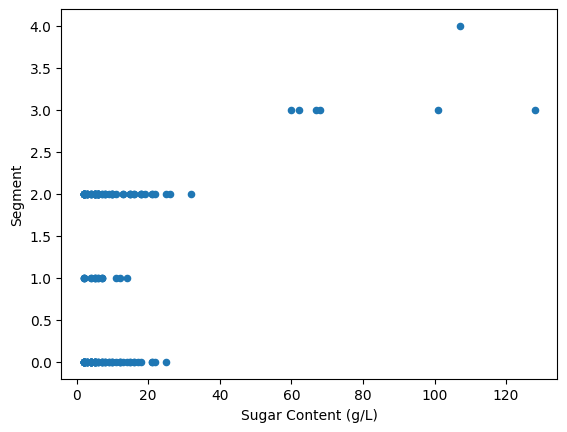

In [95]:
main_data_df.plot.scatter('Sugar Content (g/L)','Segment')

<Axes: xlabel='Segment', ylabel='Sugar Content (g/L)'>

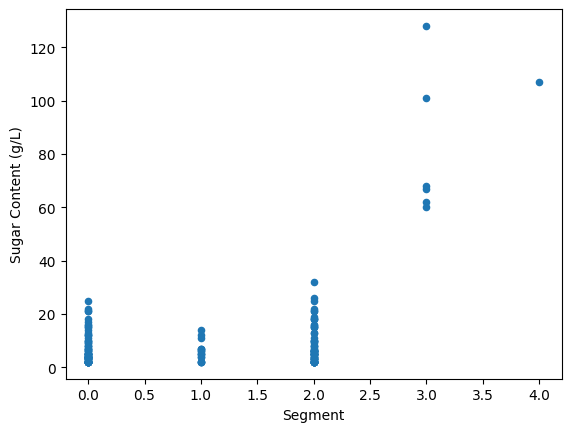

In [96]:
main_data_df.plot.scatter('Segment', 'Sugar Content (g/L)')

In [98]:
main_data_df.to_csv('sugar_recommendation.csv', index = False)